In [65]:
import json
import numpy as np
import matplotlib.pyplot as plt
import jVMC
import gpt_particle
import jax.numpy as jnp
import jax.random as jr

In [37]:
with open("boseHubbard/boseHubbard_N10_L10_J1-000_U10-000_nS256_BHgpt_4_2_4_v0/measures.json",'rb') as f:
    data = json.load(f)
# the result is a JSON string:
print(data.keys()) 

dict_keys(['jTerm', 'iTerm', 'occupation', 'H', 'ipr'])


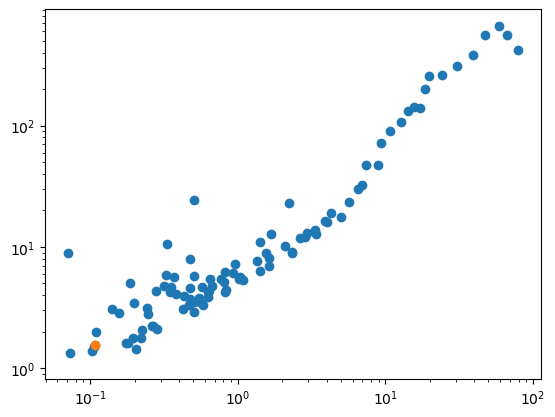

In [63]:
plt.scatter(np.abs(data["H"]["mean"]-np.min(data["H"]["mean"])),data["H"]["var"])
plt.loglog()
plt.scatter(np.abs(data["H"]["mean"][-1]-np.min(data["H"]["mean"])),data["H"]["var"][-1])


In [81]:
h5save = jVMC.util.Parameters2HDF5.h5SaveParams("boseHubbard/boseHubbard_N10_L10_J1-000_U10-000_nS256_BHgpt_4_2_4_v0/params.h5",'r')


In [82]:
param =h5save.load_model_params(None,"training_step_99")

In [83]:
with open("boseHubbard/boseHubbard_N10_L10_J1-000_U10-000_nS256_BHgpt_4_2_4_v0/config.json", "r", encoding="utf8") as f:
    config = json.load(f)
# create folder path
L = config["L"] # number of spins
N = config["N"] # number of iterations
lDim = config["lDim"]
J = config["J"]
U = config["U"]
V = config["V"]
mu = config["mu"]
lr = config["lr"]
diagShift = config["diagS"]
diagMult = config["diagM"]
num_samples = config["numSamples"]
steps = config["training_steps"]
flag_NG = config["natural_gradient"]
seed = config["seed"]
training_steps = config["training_steps"]
#"OutDir":"results", # dummy
net_name = config["net"]
net_para = config["net_parameter"]
ebDim = net_para[0]
dep = net_para[1] 
nH = net_para[2]

In [84]:
net = gpt_particle.GPT(L,N,lDim,ebDim,dep,nH)
sym = jVMC.util.symmetries.get_orbit_1D(L,"reflection","translation")
symNet = jVMC.nets.sym_wrapper.SymNet(sym,net,avgFun=jVMC.nets.sym_wrapper.avgFun_Coefficients_Sep_real)

psi = jVMC.vqs.NQS(symNet)

In [93]:
psi.parameters = param
psi.init_net(jnp.array([[[1]*L]]))

In [94]:
np.exp(psi(jnp.array([[[1]*L]]))*2)

array([[0.57363483]])

TypeError: Only length-1 arrays can be converted to Python scalars.